## Visualización COVID

Basado en el estudio de https://github.com/therealcyberlord

Analisis de los datos de la expansión del último coronavirus (SARS-CoV-2) llamado por la OMS oficialmente COVID-19, un virus respiratorio altamente contagioso que apareció en Wuhan en Diciembre del 2019. 

- Data: https://github.com/CSSEGISandData/COVID-19 Repositorio propiedad de Johns Hopkins..
- Enlace al artículo sobre el COVID-19 en la OMS  https://www.who.int/emergencies/diseases/novel-coronavirus-2019
- Enlace al artículo en el CDC https://www.cdc.gov/coronavirus/2019-ncov
- visualización de los datos con ARCGIS https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

<img src='https://newsfortomorrow.com/wp-content/uploads/2020/01/1578562454_Wuhan-pneumonia-New-coronavirus-related-to-SARS-idenitified.jpg'>

In [78]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates 
import pandas as pd 
import random
import math
import time
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

## Carga online de los datos
Los cargamos a partir del repositorio de Johns Hopkins en git

In [79]:
#confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [80]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


## Vista de Detalle
Gráficas con la evolución de contagios en un país específico, a seleccionar más abajo

In [81]:
 np.sort(confirmed_df["Country/Region"].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

### Poner aquí abajo el pais elegido de la lista de arriba

In [82]:
pais_elegido = "Spain"

pais_versus = "Italy"

In [83]:
# Me quedo con las fechas nada mas, de la columna 4 en adelante. Las usaré de pie de gráficos por claridad
cols = confirmed_df.columns
col_fechas_ind = cols[4:]

#las paso a fecha
x_values = [datetime.datetime.strptime(d,"%m/%d/%y").date() for d in col_fechas_ind.values]

In [84]:
# chequeo Pais
esp_confirmed = confirmed_df[confirmed_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind]
esp_confirmed_y = esp_confirmed.values[0]

esp_total_deaths = deaths_df[deaths_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind].values[0]
esp_total_recovery = recoveries_df[recoveries_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind].values[0]

esp_outers = esp_total_deaths + esp_total_recovery
esp_occupancy = esp_confirmed_y - esp_outers



In [85]:
esp_confirmed.values[0]

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      1,      1,      1,      1,      1,      1,
            1,      1,      2,      2,      2,      2,      2,      2,
            2,      2,      2,      2,      2,      2,      2,      2,
            2,      2,      6,     13,     15,     32,     45,     84,
          120,    165,    222,    259,    400,    500,    673,   1073,
         1695,   2277,   2277,   5232,   6391,   7798,   9942,  11748,
        13910,  17963,  20410,  25374,  28768,  35136,  39885,  49515,
        57786,  65719,  73235,  80110,  87956,  95923, 104118, 112065,
       119199, 126168, 131646, 136675, 141942], dtype=int64)

In [86]:


itl_confirmed = confirmed_df[confirmed_df["Country/Region"]==pais_versus].groupby("Country/Region").sum().loc[:, col_fechas_ind]
itl_confirmed_y = itl_confirmed.values[0]

iterador = list (itl_confirmed)
for i in iterador: 
    if itl_confirmed[i][0] != 0:
        itl_fecha_1er_infectado =  i
        break
print (itl_fecha_1er_infectado)

1/31/20


In [87]:
limpio2 = []
iterador = list (itl_confirmed)
for i in iterador: 
    if itl_confirmed[i][0] != 0:
        conf = itl_confirmed[i][0]
        limpio2.append (conf)
        

In [88]:
limpio1 = []
iterador = list (esp_confirmed)
for i in iterador: 
    if esp_confirmed[i][0] != 0:
        conf = esp_confirmed[i][0]
        limpio1.append (conf )

limpio2 = limpio2[:len(limpio1)]


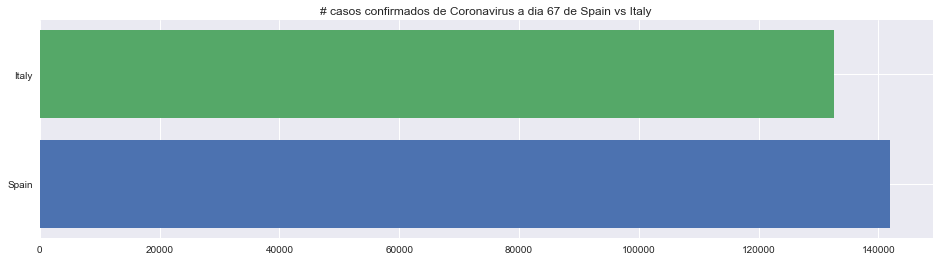

In [89]:
plt.figure(figsize=(16, 4))
plt.barh(pais_elegido, limpio1)
plt.barh(pais_versus, limpio2)
plt.title('# casos confirmados de Coronavirus a dia {} de {} vs {}'.format(len(limpio1), pais_elegido, pais_versus))
plt.show()

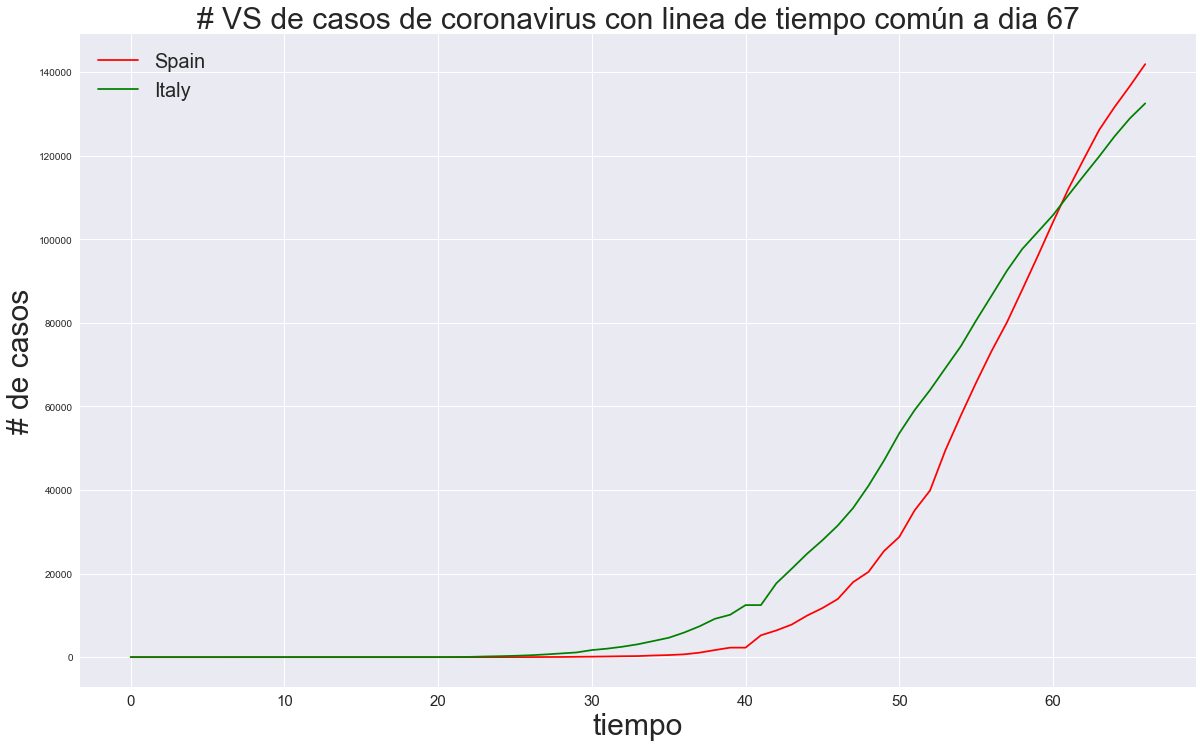

In [90]:
plt.figure(figsize=(20, 12))
plt.plot(limpio1, color='r')
plt.plot(limpio2, color='green')
plt.legend([pais_elegido, pais_versus], loc='best', fontsize=20)
plt.title('# VS de casos de coronavirus con linea de tiempo común a dia {}'.format(len(limpio1)), size=30)
plt.xlabel('tiempo', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=15)
plt.show()

In [91]:

esp_mortality_rate = []

# totalizamos en un array los ratios
for i in range(len(esp_total_deaths)):
    if (esp_confirmed_y[i] == 0):
        esp_mortality_rate.append(0)
    else:    
        esp_mortality_rate.append(esp_total_deaths[i]/esp_confirmed_y[i])


In [92]:
esp_tasa_crecimiento = []

for i in range(len(esp_confirmed_y)):
    if i>0 :
        esp_tasa_crecimiento.append (esp_confirmed_y[i]-esp_confirmed_y[i-1])
    else :
        esp_tasa_crecimiento.append(0)

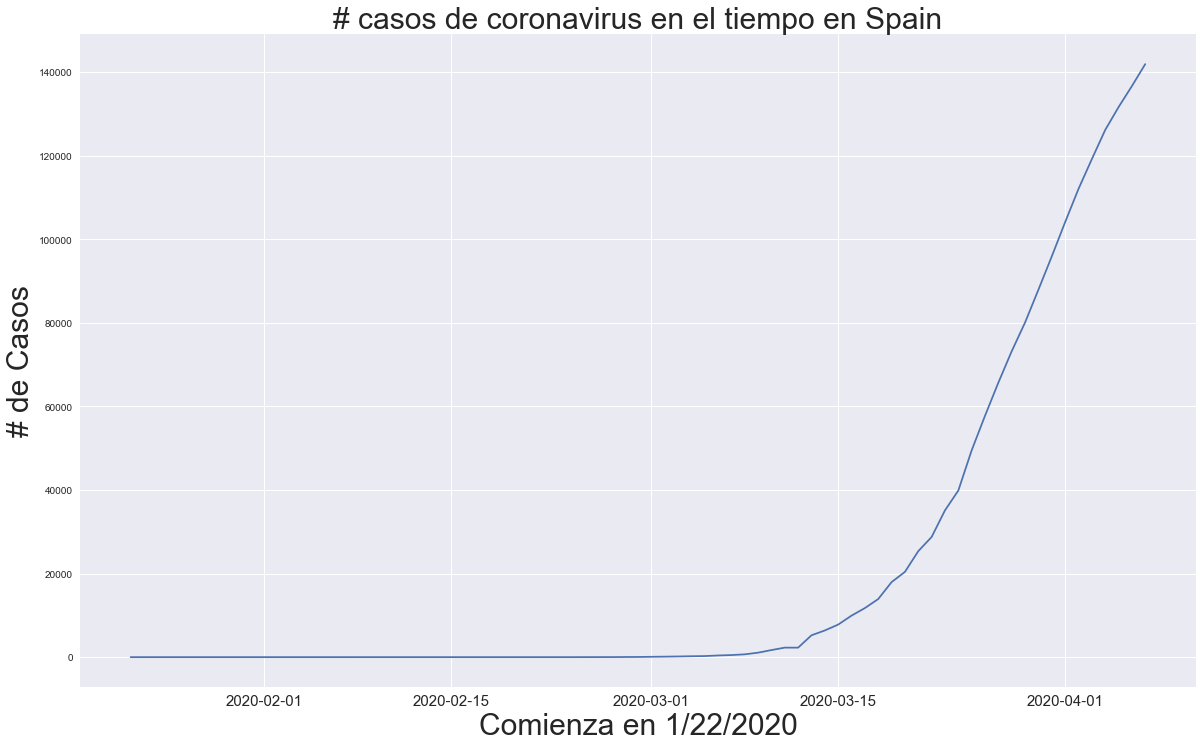

In [93]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_confirmed_y)
plt.title('# casos de coronavirus en el tiempo en {}'.format(pais_elegido), size=30)
plt.xlabel('Comienza en 1/22/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.xticks(size=15)
plt.show()

In [95]:
# me quedo con cuando hubo mas de 5 infectados por primera vez 
first_day = np.argmax(esp_outers>5)
esp_outers     = esp_outers[first_day:]
esp_occupancy  = esp_occupancy[first_day:]
col_fechas_ind = col_fechas_ind[first_day:]

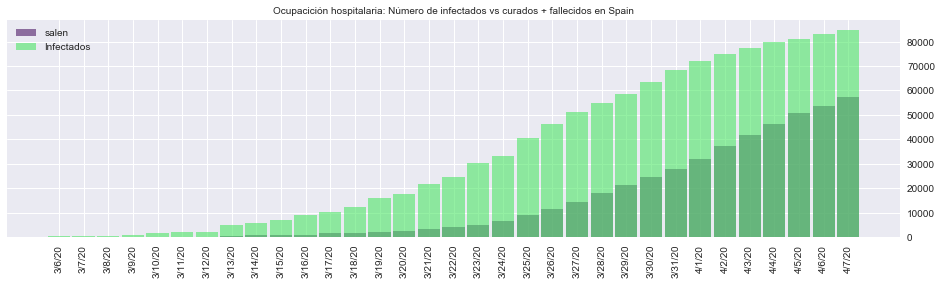

In [98]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
plt.title('Ocupacición hospitalaria: Número de infectados vs curados + fallecidos en {}'.format(pais_elegido), size=10)
plt.bar( col_fechas_ind, np.ndarray.tolist(esp_outers),width = 0.9, color = (0.3,0.1,0.4,0.6), label='salen')
plt.bar( col_fechas_ind, np.ndarray.tolist(esp_occupancy),width = 0.9, color = (0.3,0.9,0.4,0.6), label='Infectados')
plt.xticks(size=10, rotation=90)


plt.legend()

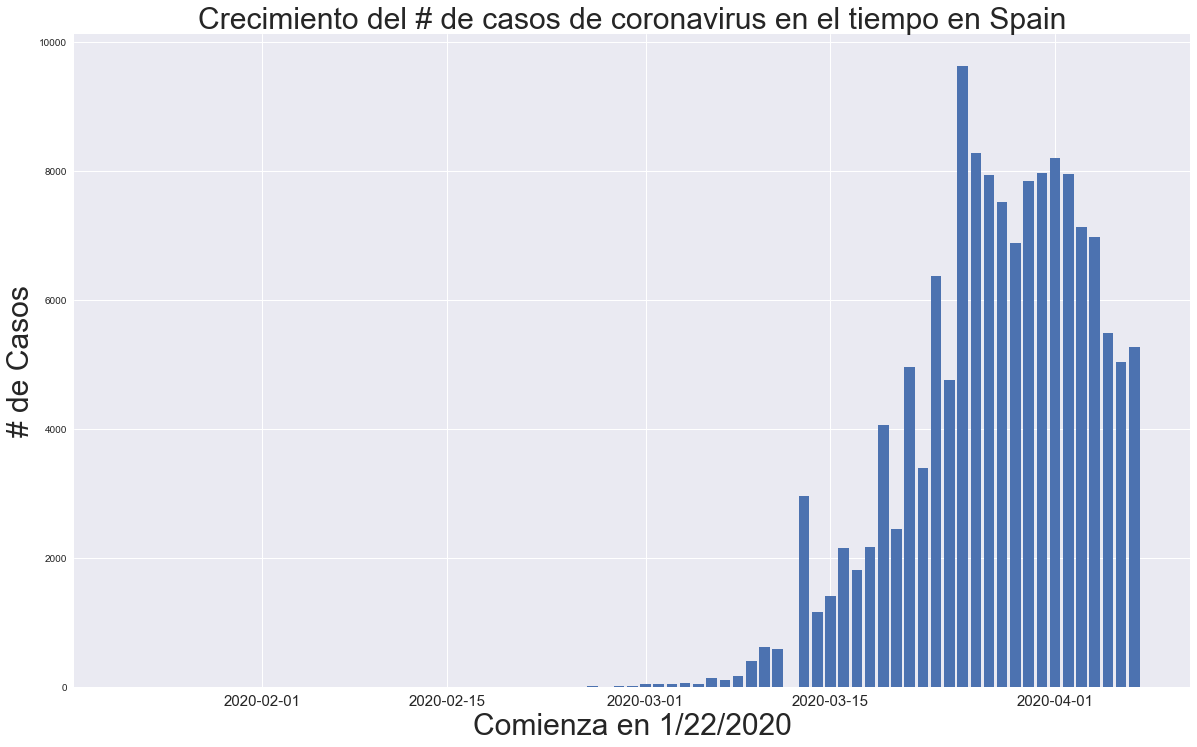

In [17]:
plt.figure(figsize=(20, 12))
plt.bar(x_values, esp_tasa_crecimiento)
plt.title('Crecimiento del # de casos de coronavirus en el tiempo en {}'.format(pais_elegido), size=30)
plt.xlabel('Comienza en 1/22/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.xticks(size=15)
plt.show()

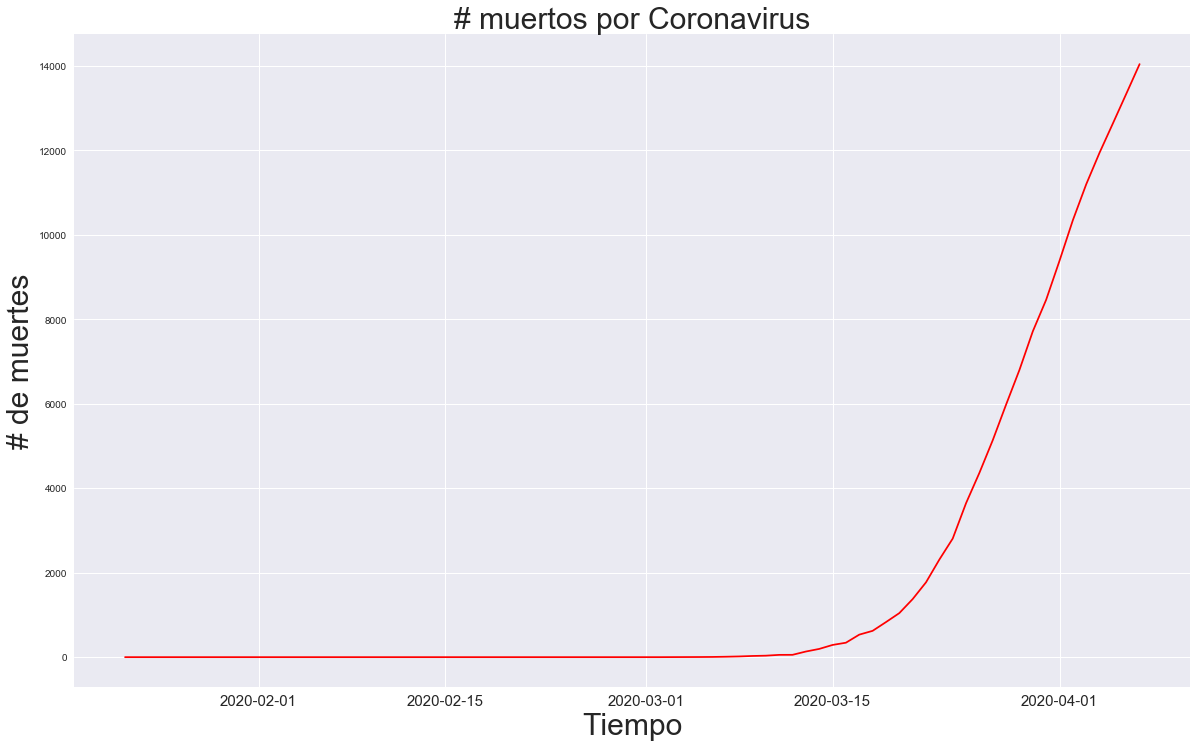

In [18]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_total_deaths, color='red')
plt.title('# muertos por Coronavirus', size=30)
plt.xlabel('Tiempo', size=30)
plt.ylabel('# de muertes', size=30)
plt.xticks(size=15)
plt.show()

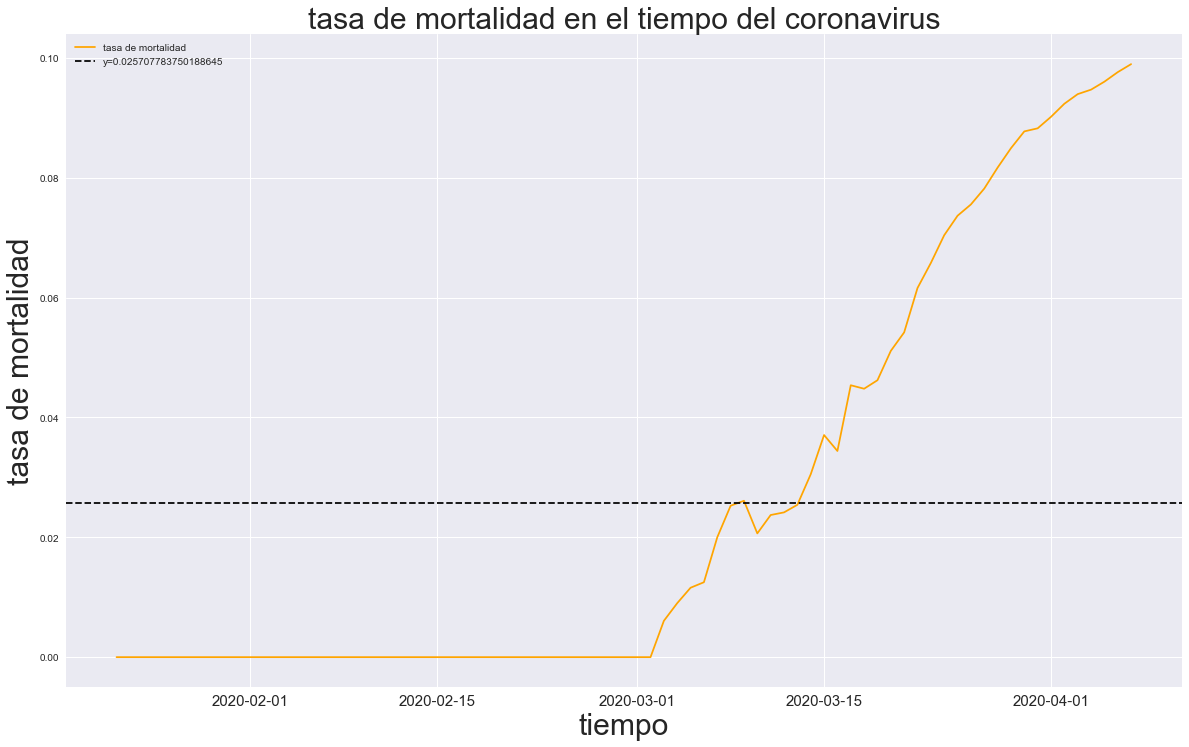

In [19]:
esp_mean_mortality_rate = np.mean(esp_mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_mortality_rate, color='orange')
plt.axhline(y = esp_mean_mortality_rate,linestyle='--', color='black')
plt.title('tasa de mortalidad en el tiempo del coronavirus', size=30)
plt.legend(['tasa de mortalidad', 'y='+str(esp_mean_mortality_rate)])
plt.xlabel('tiempo', size=30)
plt.ylabel('tasa de mortalidad', size=30)
plt.xticks(size=15)
plt.show()


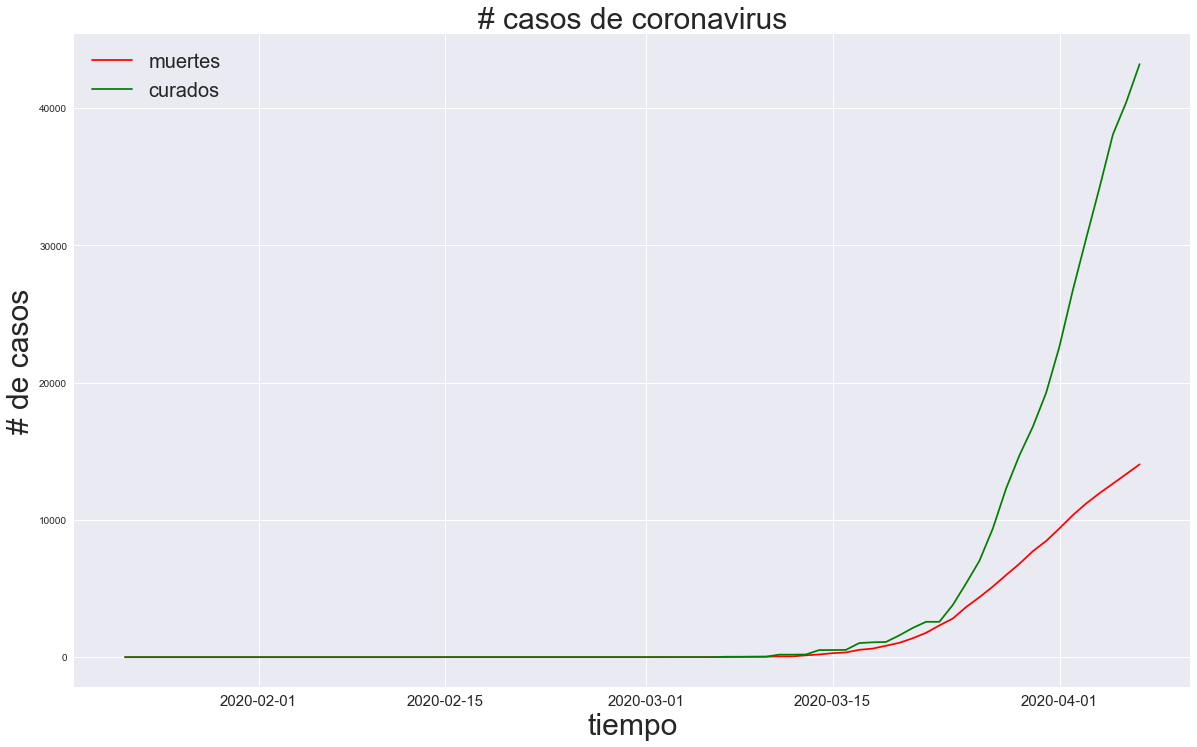

In [20]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_total_deaths, color='r')
plt.plot(x_values, esp_total_recovery, color='green')
plt.legend(['muertes', 'curados'], loc='best', fontsize=20)
plt.title('# casos de coronavirus', size=30)
plt.xlabel('tiempo', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=15)
plt.show()


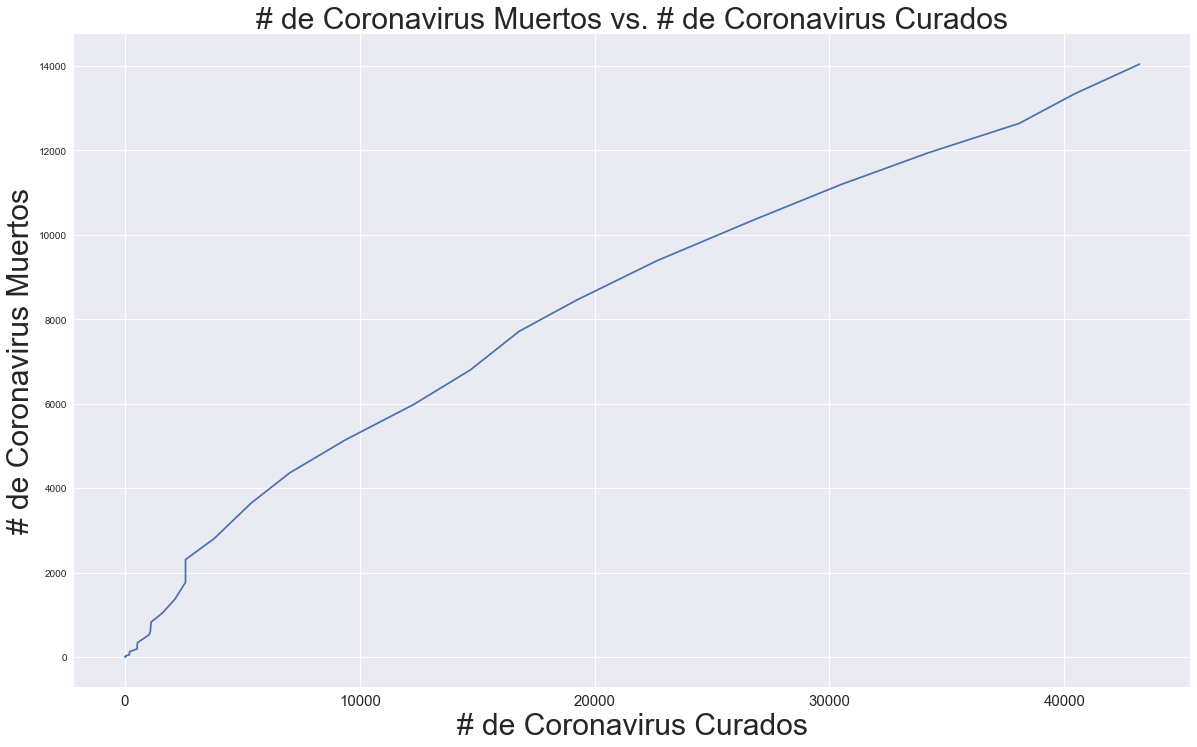

In [21]:
plt.figure(figsize=(20, 12))
plt.plot(esp_total_recovery, esp_total_deaths)
plt.title('# de Coronavirus Muertos vs. # de Coronavirus Curados', size=30)
plt.xlabel('# de Coronavirus Curados', size=30)
plt.ylabel('# de Coronavirus Muertos', size=30)
plt.xticks(size=15)
plt.show()

# Estudio global

Me quedo con los datos numéricos nada más, asi que cojo solo las col_fechas_ind.

In [22]:
confirmed = confirmed_df.loc[:, col_fechas_ind]
deaths = deaths_df.loc[:, col_fechas_ind]
recoveries = recoveries_df.loc[:, col_fechas_ind]

Creamos arrays  con todo

In [23]:
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

# totalizamos en un array los resultados
for i in col_fechas_ind:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)


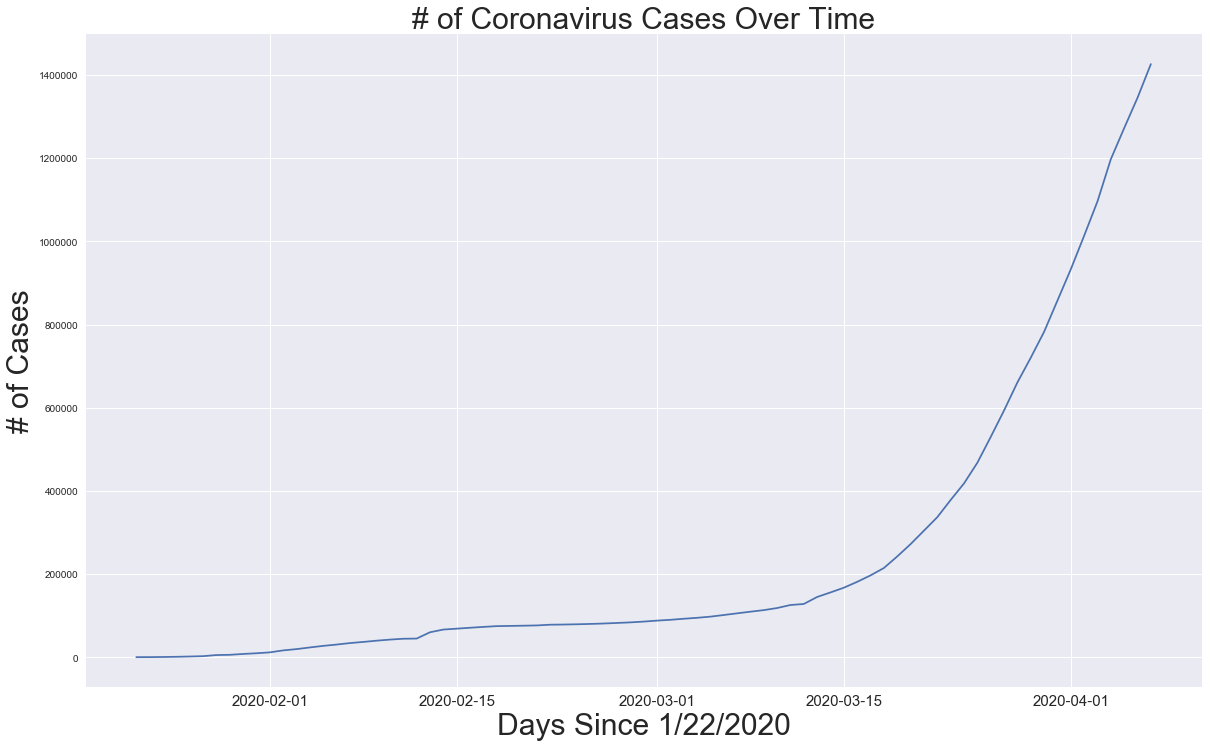

In [24]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()

Representaremos el númerode casos confirmados, recuperaciones, muertes y ratio de mortalidad a través del tiempo.

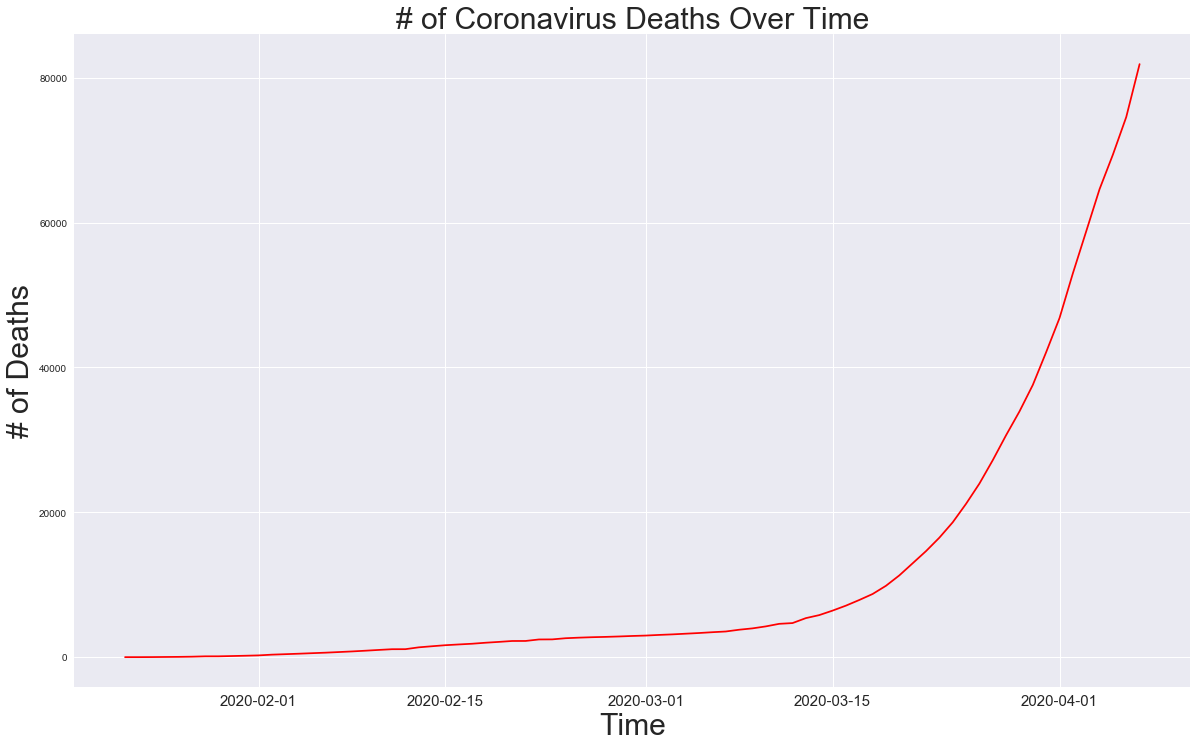

In [25]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(size=15)
plt.show()

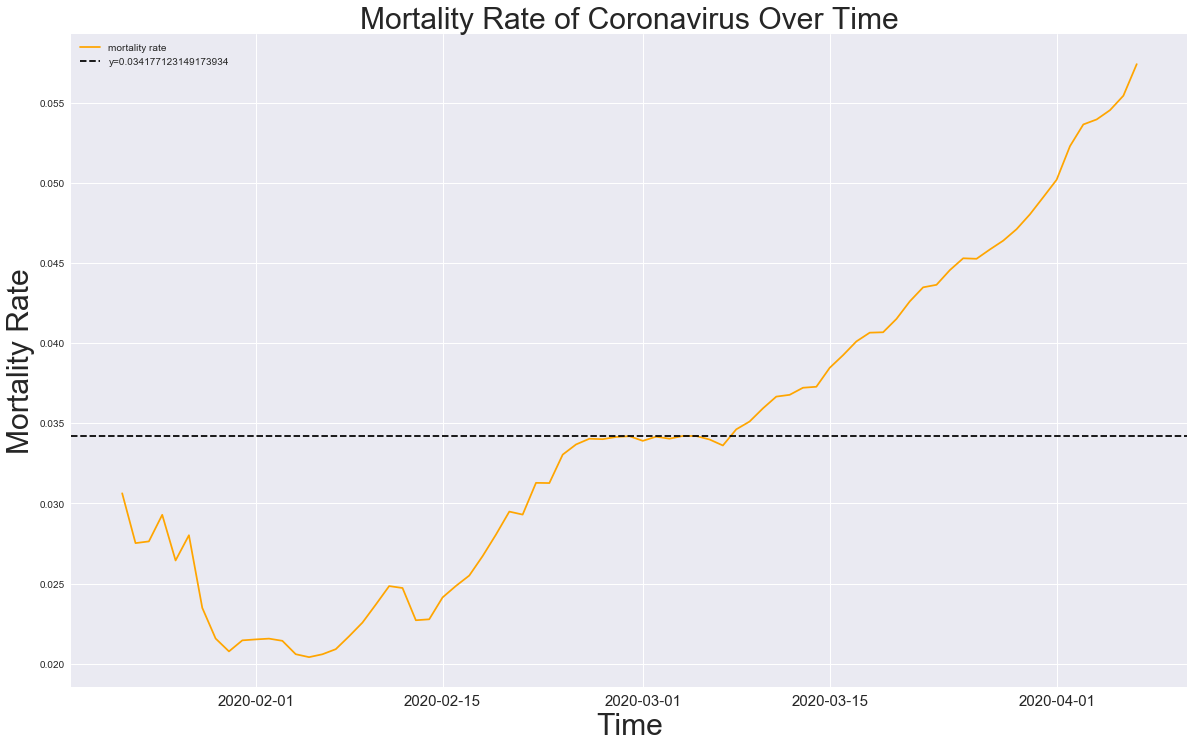

In [26]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(x_values, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.show()

Graphing the number of deaths and the number of recoveries

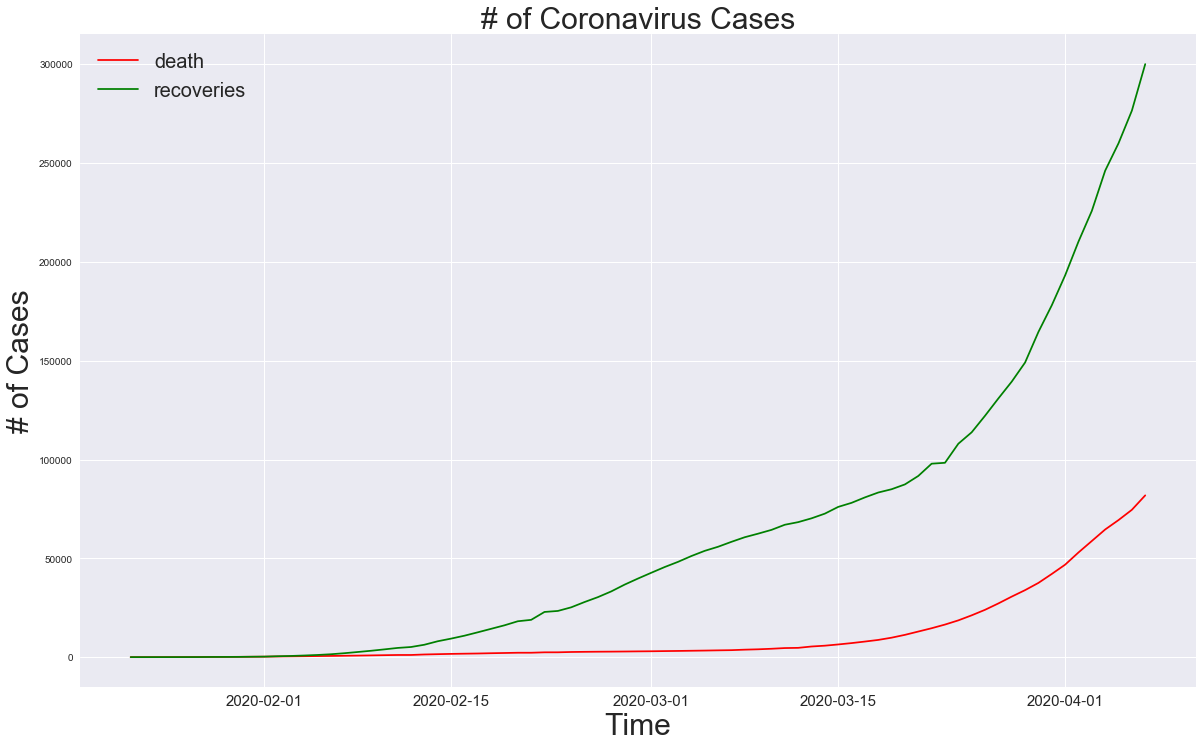

In [27]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, total_deaths, color='r')
plt.plot(x_values, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()





Plotting deaths vs recoveries

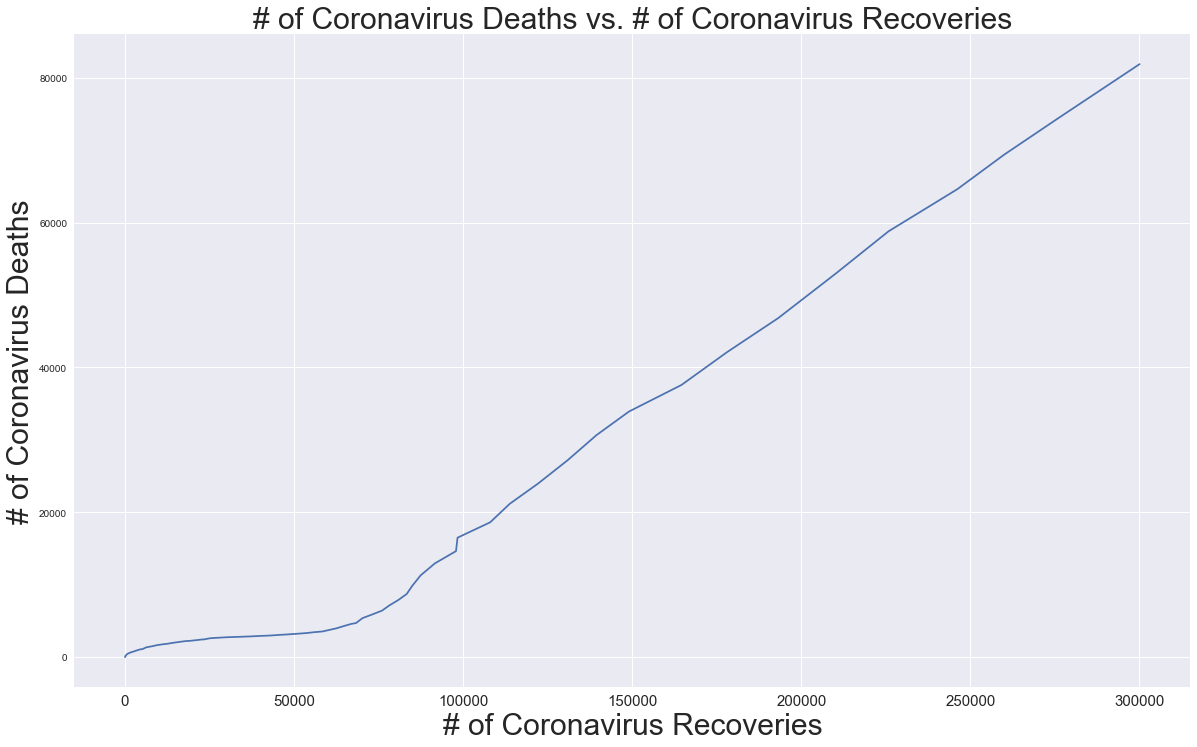

In [28]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [29]:
latest_confirmed = confirmed_df[col_fechas_ind[-1]]
latest_deaths = deaths_df[col_fechas_ind[-1]]
latest_recoveries = recoveries_df[col_fechas_ind[-1]]

Getting information about countries/regions that have confirmed coronavirus cases

In [30]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [31]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region']==unique_countries[i]].sum()

In [32]:
# number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 396223 cases
Spain: 141942 cases
Italy: 135586 cases
France: 110065 cases
Germany: 107663 cases
China: 82718 cases
Iran: 62589 cases
United Kingdom: 55949 cases
Turkey: 34109 cases
Switzerland: 22253 cases
Belgium: 22194 cases
Netherlands: 19709 cases
Canada: 17872 cases
Brazil: 14034 cases
Austria: 12639 cases
Portugal: 12442 cases
Korea, South: 10331 cases
Israel: 9248 cases
Sweden: 7693 cases
Russia: 7497 cases
Norway: 6086 cases
Australia: 5895 cases
Ireland: 5709 cases
India: 5311 cases
Denmark: 5266 cases
Chile: 5116 cases
Czechia: 5017 cases
Poland: 4848 cases
Romania: 4417 cases
Pakistan: 4035 cases
Malaysia: 3963 cases
Japan: 3906 cases
Philippines: 3764 cases
Ecuador: 3747 cases
Luxembourg: 2970 cases
Peru: 2954 cases
Saudi Arabia: 2795 cases
Indonesia: 2738 cases
Serbia: 2447 cases
Mexico: 2439 cases
United Arab Emirates: 2359 cases
Finland: 2308 cases
Thailand: 2258 cases
Panama: 2100 cases
Qatar: 2057 cases
Dominican Republic: 1956

In [100]:
unique_provinces =  list(confirmed_df['Province/State'].unique())
# those are countries, which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    try:
        unique_provinces.remove(i)
    except:
        print (f"{i} not in unique_provinces list")

United Kingdom not in unique_provinces list
Denmark not in unique_provinces list
France not in unique_provinces list


### Actualizando los datos
Con los últimos datos presentes preparamos varias gráficas agrupadas

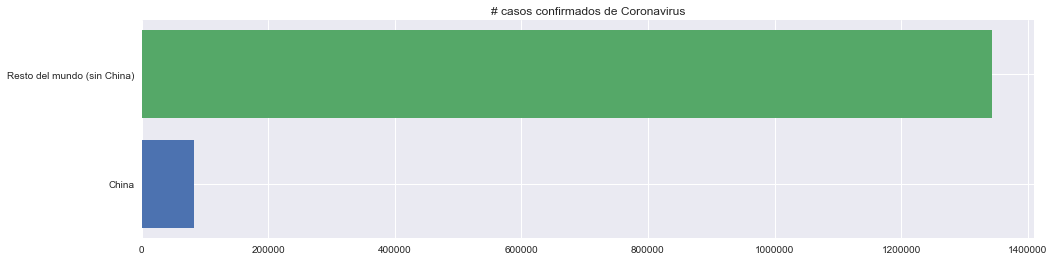

In [101]:
china_confirmed = latest_confirmed[confirmed_df['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 4))
plt.barh('China', china_confirmed)
plt.barh('Resto del mundo (sin China)', outside_mainland_china_confirmed)
plt.title('# casos confirmados de Coronavirus')
plt.show()


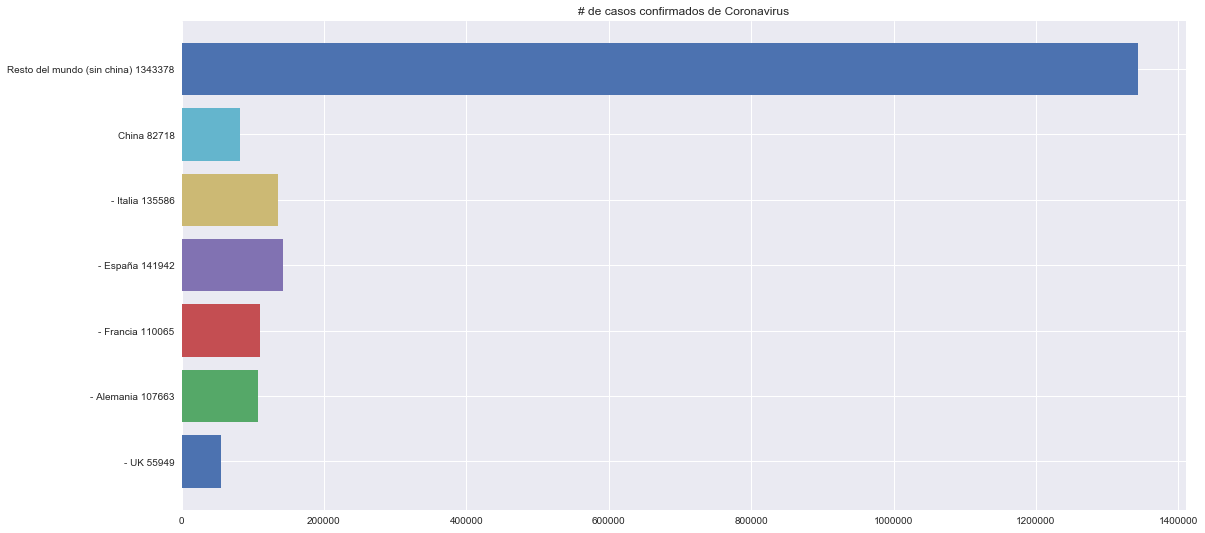

In [102]:
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
spain_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Spain'].sum()
italy_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Italy'].sum()
germany_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Germany'].sum()
france_confirmed = latest_confirmed[confirmed_df['Country/Region']=='France'].sum()
united_kingdom_confirmed = latest_confirmed[confirmed_df['Country/Region']=='United Kingdom'].sum()
plt.figure(figsize=(18, 9))

plt.barh('- UK {}'.format(united_kingdom_confirmed),united_kingdom_confirmed)
plt.barh('- Alemania {}'.format(germany_confirmed), germany_confirmed)
plt.barh('- Francia {}'.format(france_confirmed), france_confirmed)
plt.barh('- España {}'.format(spain_confirmed), spain_confirmed)
plt.barh('- Italia {}'.format(italy_confirmed), italy_confirmed)
plt.barh('China {}'.format(china_confirmed), china_confirmed)
plt.barh('Resto del mundo (sin china) {}'.format(outside_mainland_china_confirmed), outside_mainland_china_confirmed)

plt.title('# de casos confirmados de Coronavirus')
plt.show()

## Representaciones visuales para el mundo (barras y tartas)

In [103]:
# Mostramos los diez mayores, resto agrupamos
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

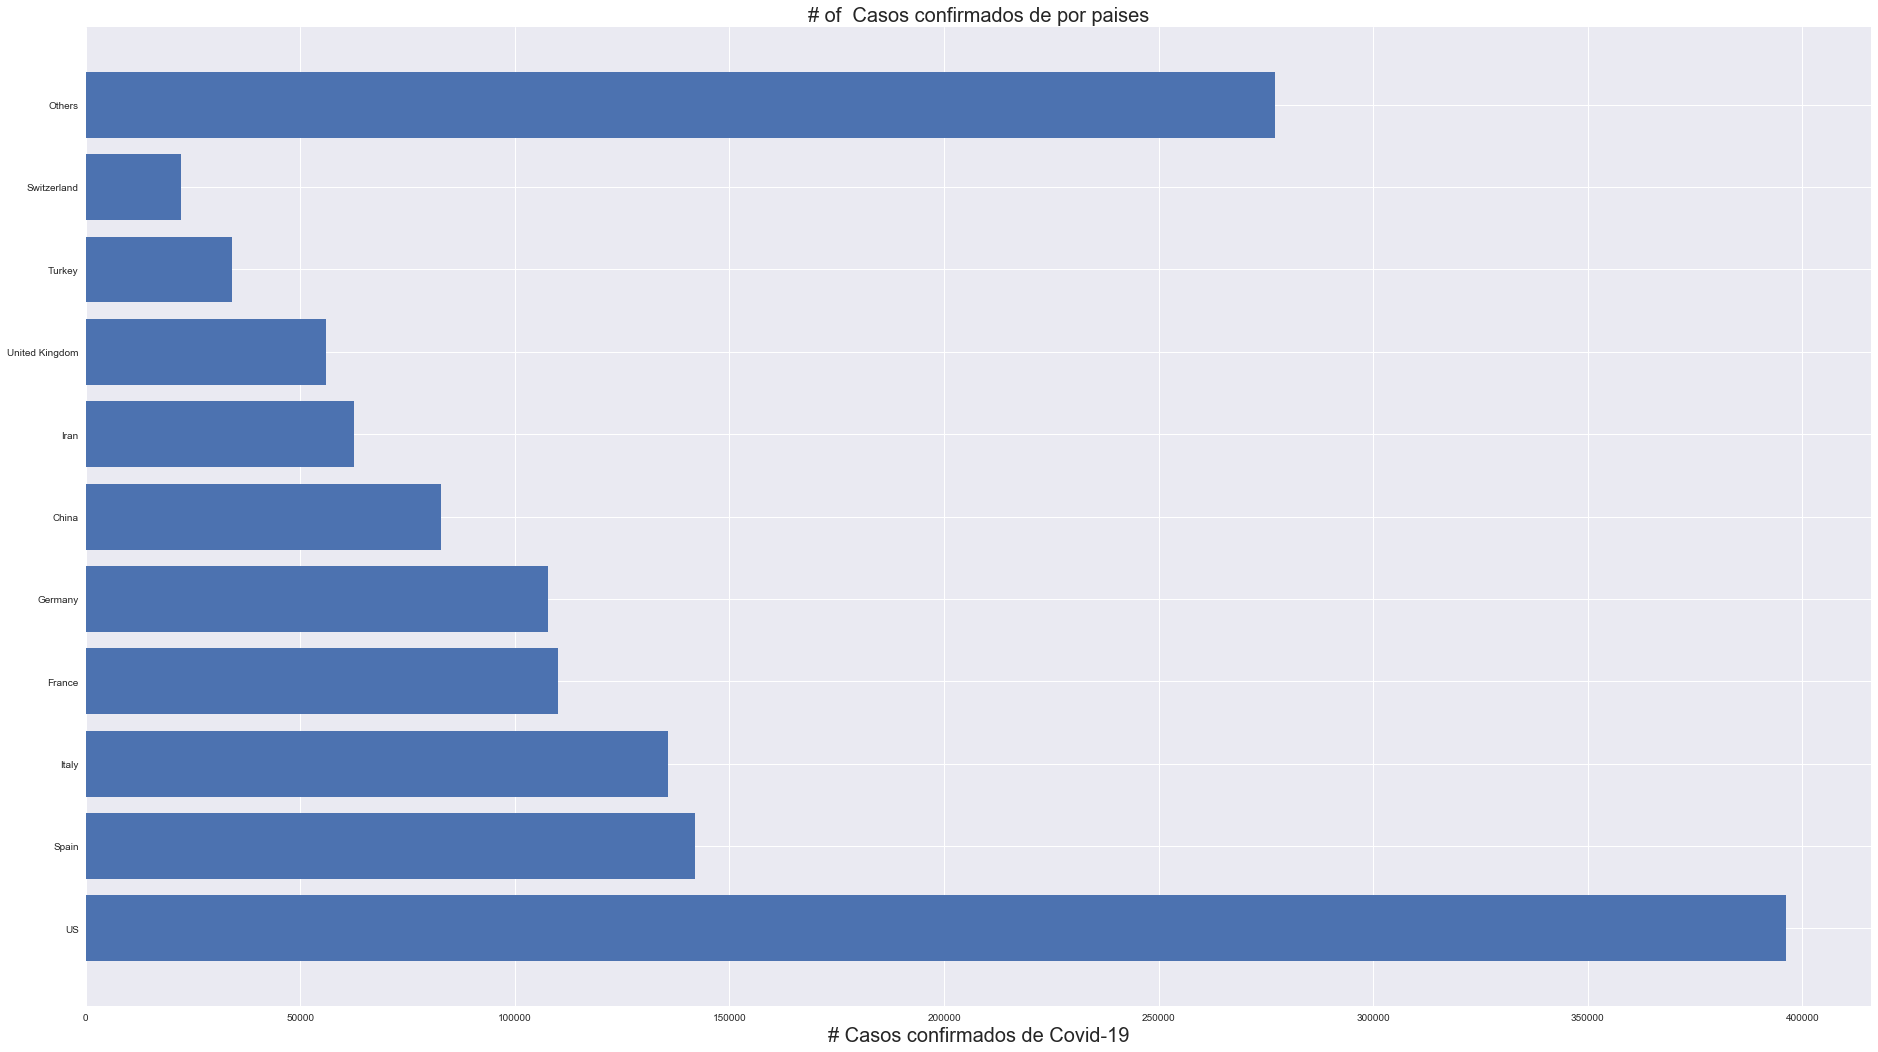

In [104]:
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# of  Casos confirmados de por paises', size=20)
plt.xlabel('# Casos confirmados de Covid-19', size=20)
plt.show()

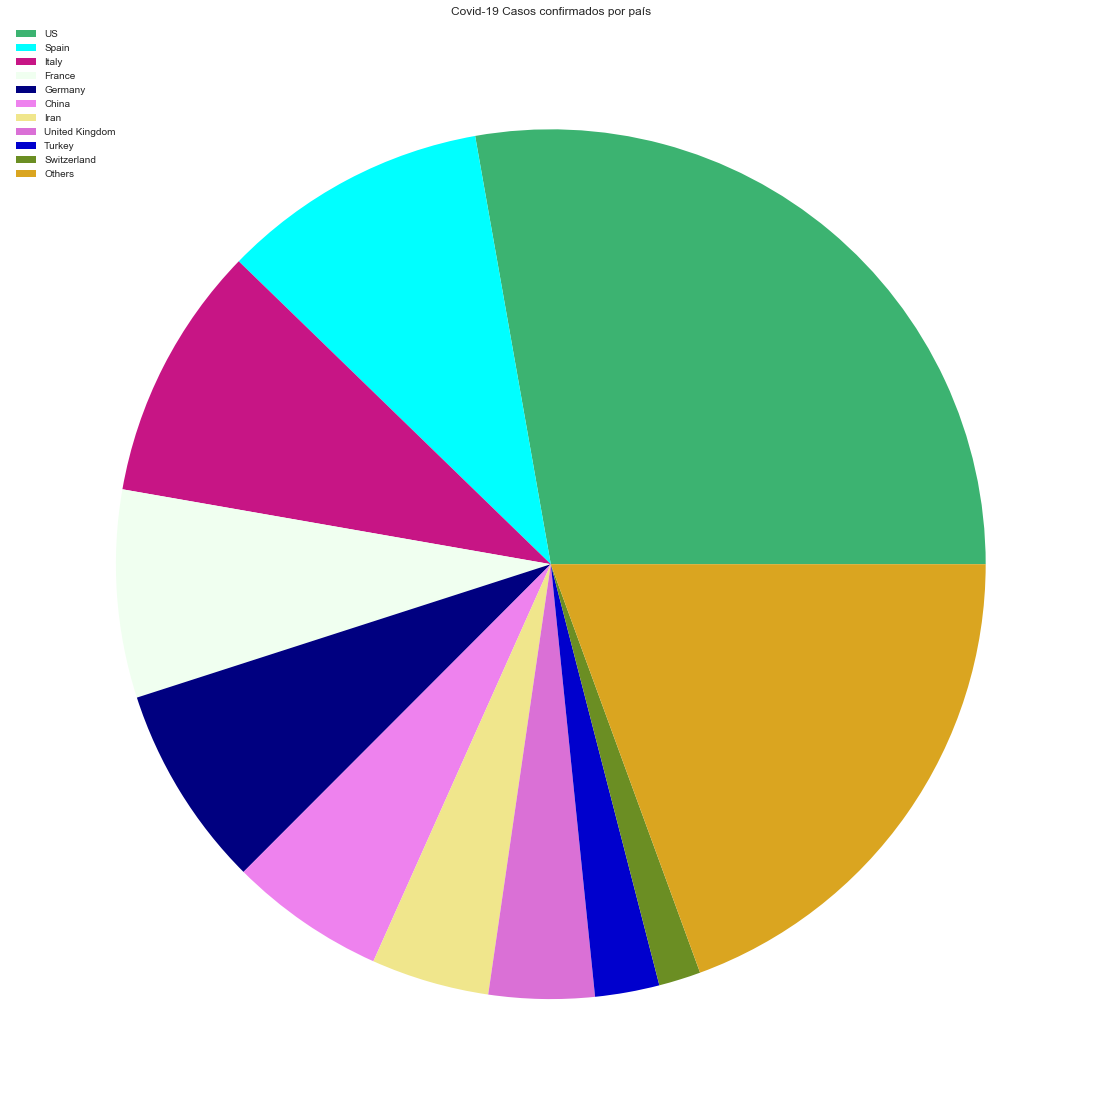

In [105]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados por país')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

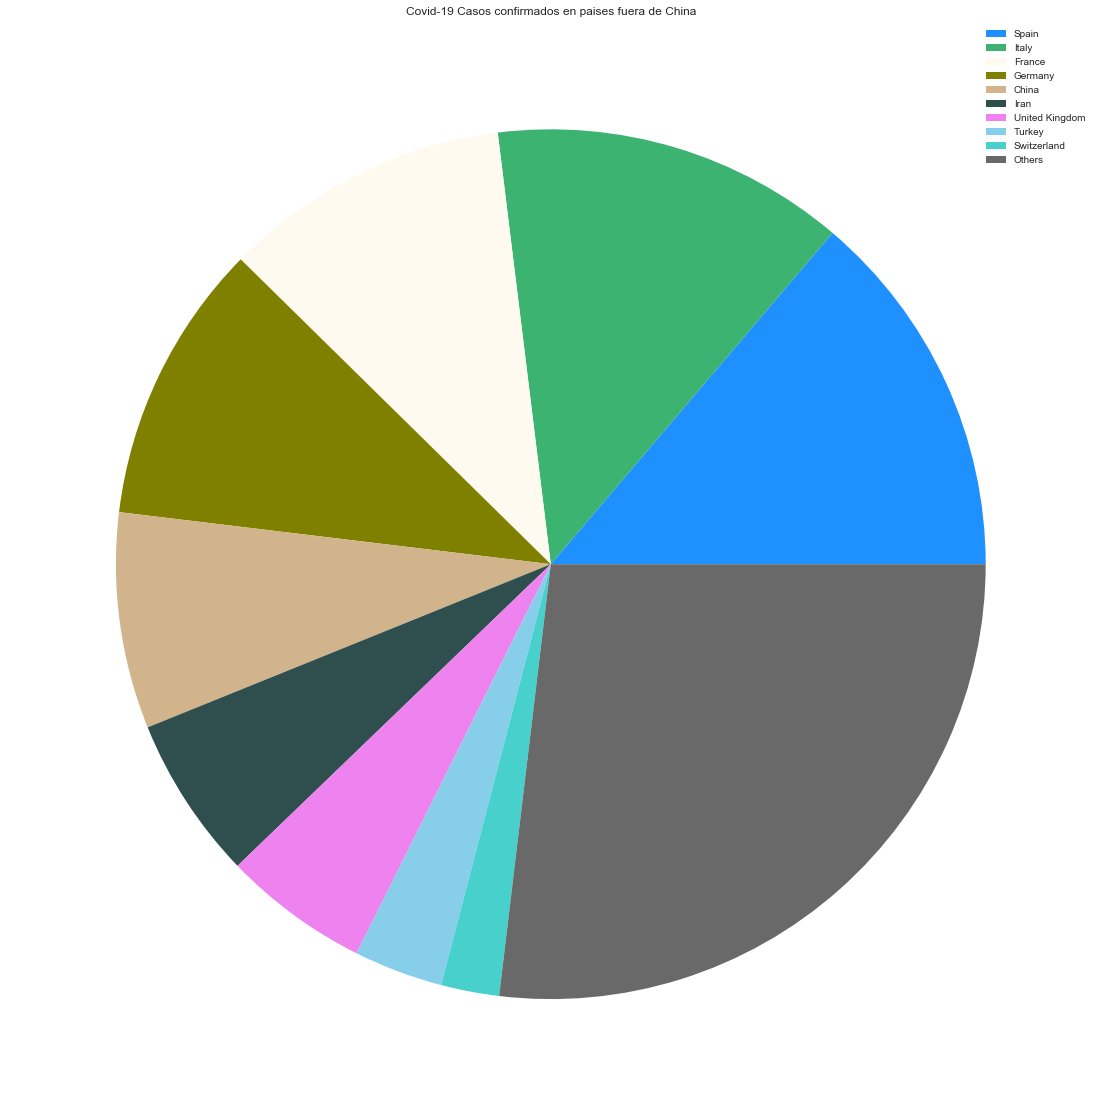

In [106]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados en paises fuera de China')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

## Casos por estados en los usa 
(si aun vienen separados por tal)

In [135]:

TheUs = confirmed_df[confirmed_df['Country/Region']=='US'].fillna(0)

if TheUs.shape[0] >1:
    us_regions = list(TheUs['Province/State'].unique())
else:
    us_regions = list(TheUs[1])
us_confirmed_cases = []
no_cases = [] 
for i in us_regions:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        us_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    us_regions.remove(i)


KeyError: 1

In [136]:
TheUs

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
225,0,US,37.0902,-95.7129,1,1,2,2,5,5,...,140909,161837,188172,213372,243616,275586,308850,337072,366667,396223


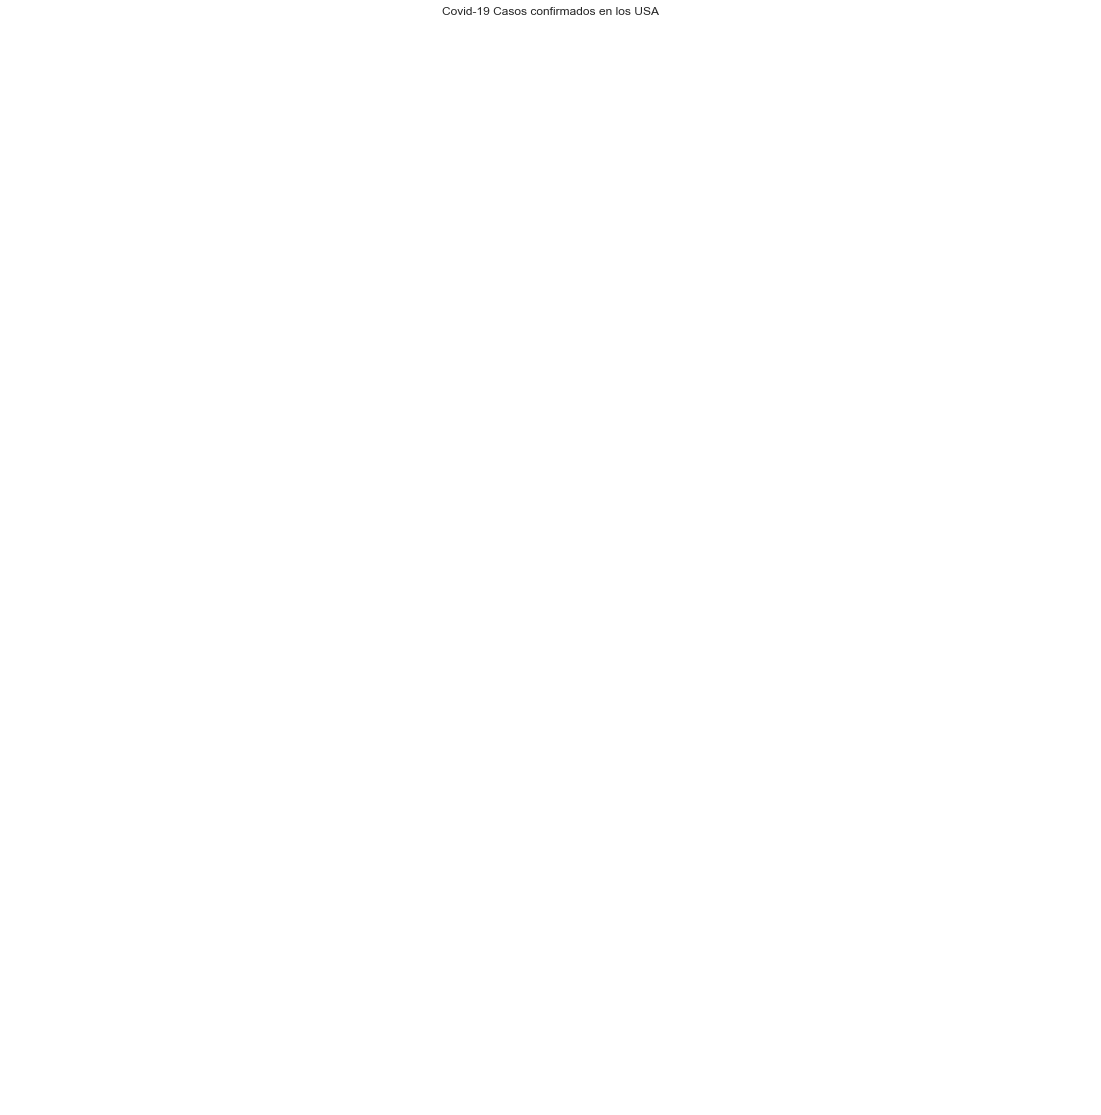

In [129]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados en los USA')
plt.pie(us_confirmed_cases, colors=c)
plt.legend(us_regions, loc='best')
plt.show()